# Imports

In [1]:
import warnings

import pandas as pd

from functions.loading import load_data

from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

# Parameters definition

In [2]:
# paths
path_rawdata = 'data/raw_data/'
path_models = 'models/all_features/'
path_benchmark = 'benchmark/'
path_results = 'results/all_features/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/all_features/'
path_plot = 'results/all_features/plot/'

# Training parameters
targets = ["cf1_log","cf2_log","cf3_log", "cf123_log"]
models = {
        "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "seed":0,
    "n_iter":10,
    "extended_features": [
            "revenue_log",
            "employees_log",
            "asset_log",
            "nppe_log",
            "capex_log",
            "age",
            "cap_inten",
            "gmar",
            "leverage",
            "price",
            "fuel_intensity",
            "fiscal_year",
            "energy_consumed_log",
            "energy_produced_log",
            "intan_log",
            "accu_dep_log",
            "cogs_log",
        ],
    "selec_sect":["gics_sub_ind", "gics_ind", "gics_group"],
    "cross_val": False,
}
restricted_features=False
save=True,

# Results containers
summary_final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

# Data Loading 

In [3]:
preprocessed_dataset = load_data(path_rawdata, save=True)

# Training pipeline 

cf1_log
Using pre created preprocessed files
preprocessing done
modelisation done
cf2_log
Using pre created preprocessed files
preprocessing done
modelisation done
cf3_log
Using pre created preprocessed files
preprocessing done
modelisation done
cf123_log
Using pre created preprocessed files
preprocessing done
modelisation done


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

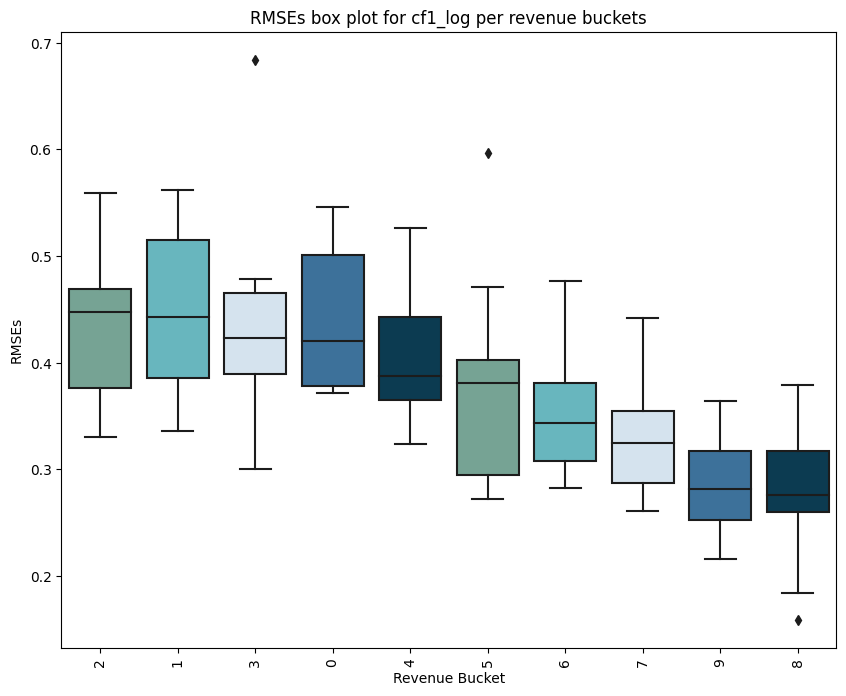

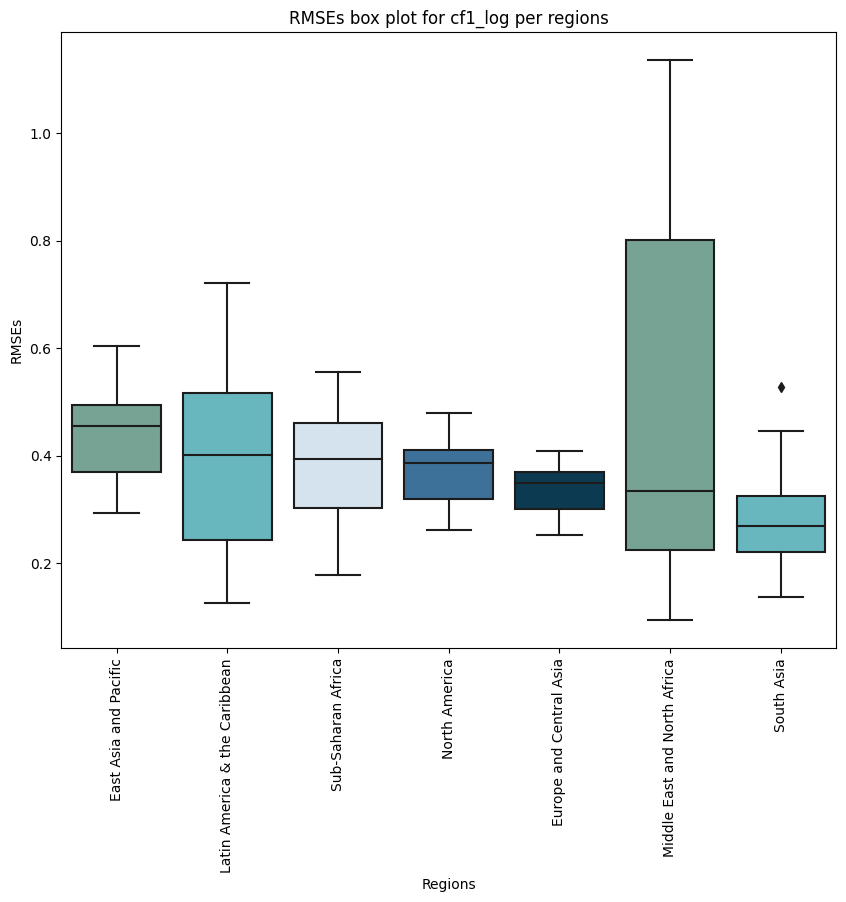

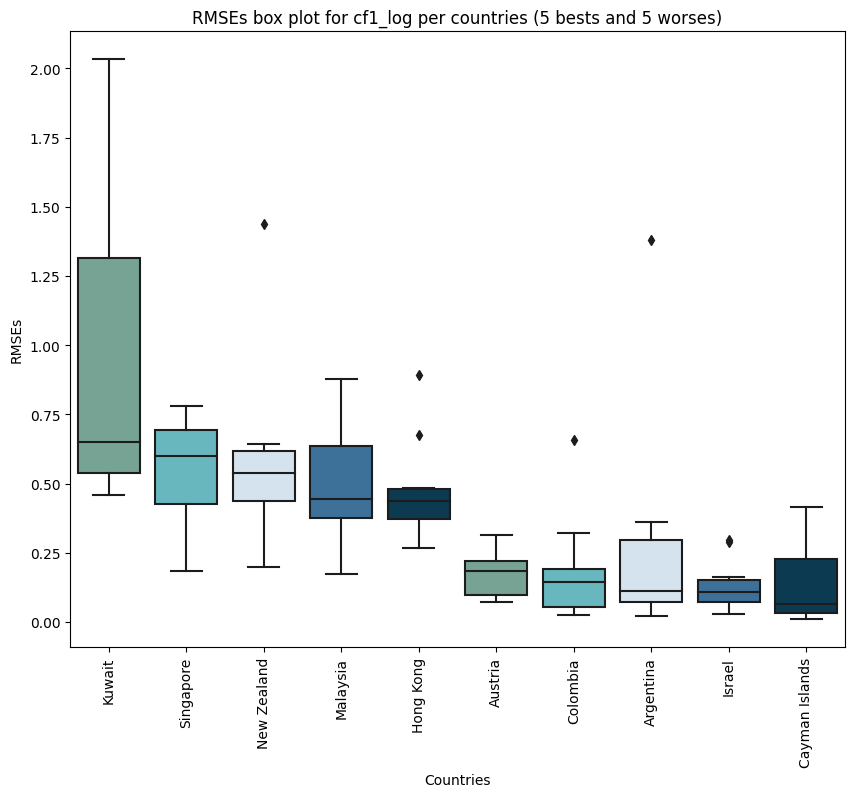

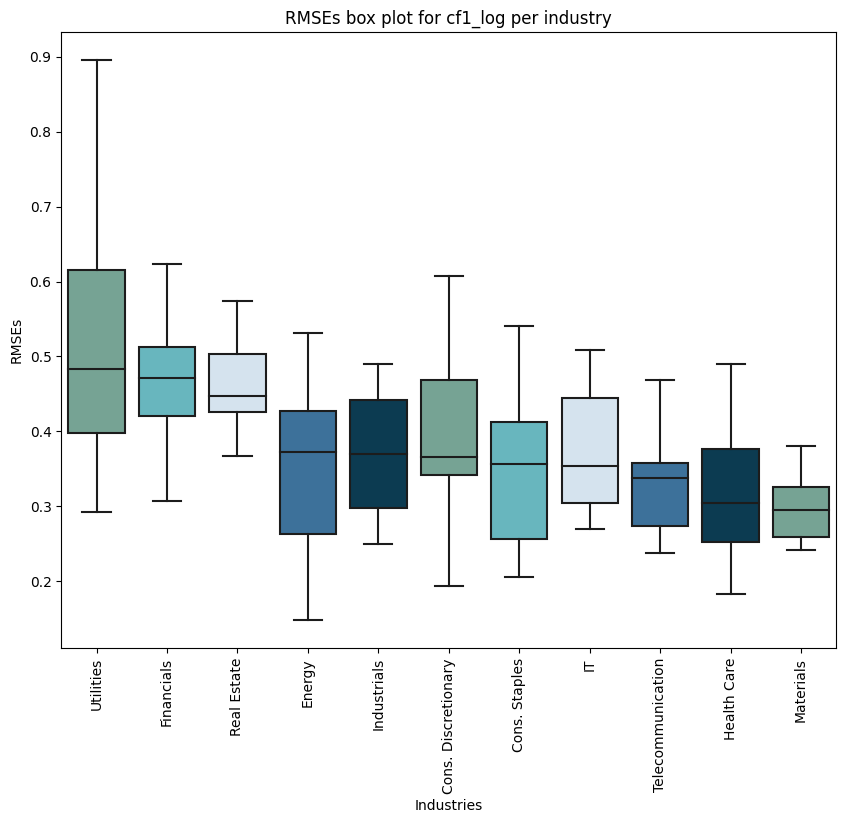

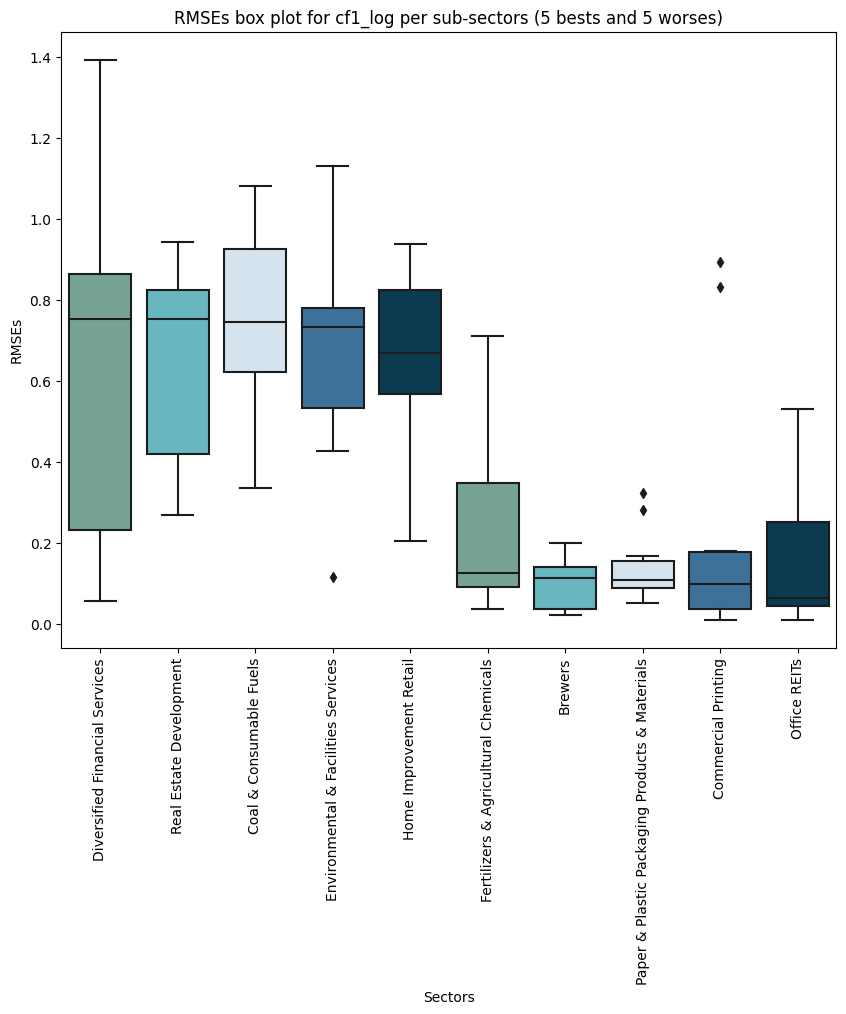

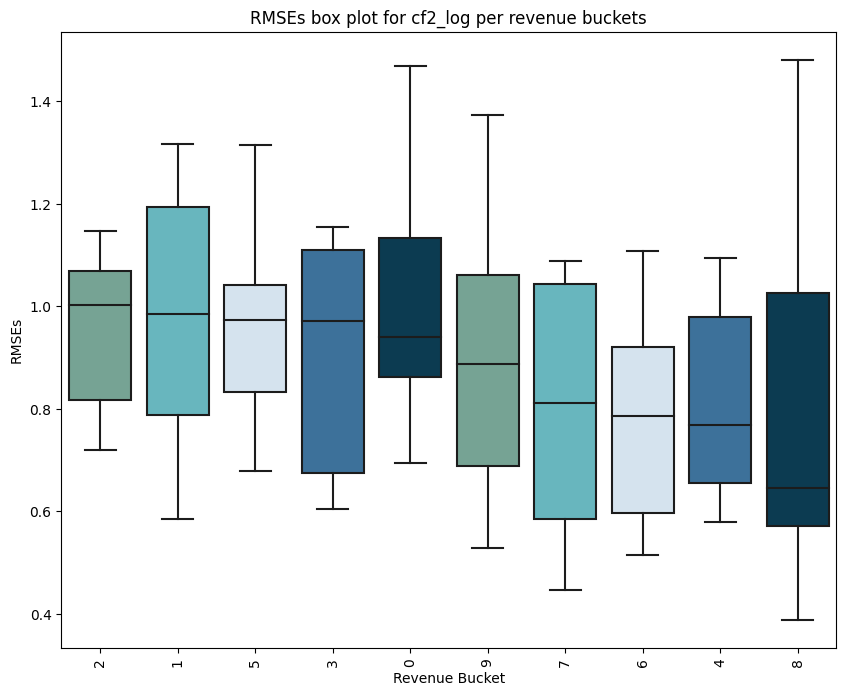

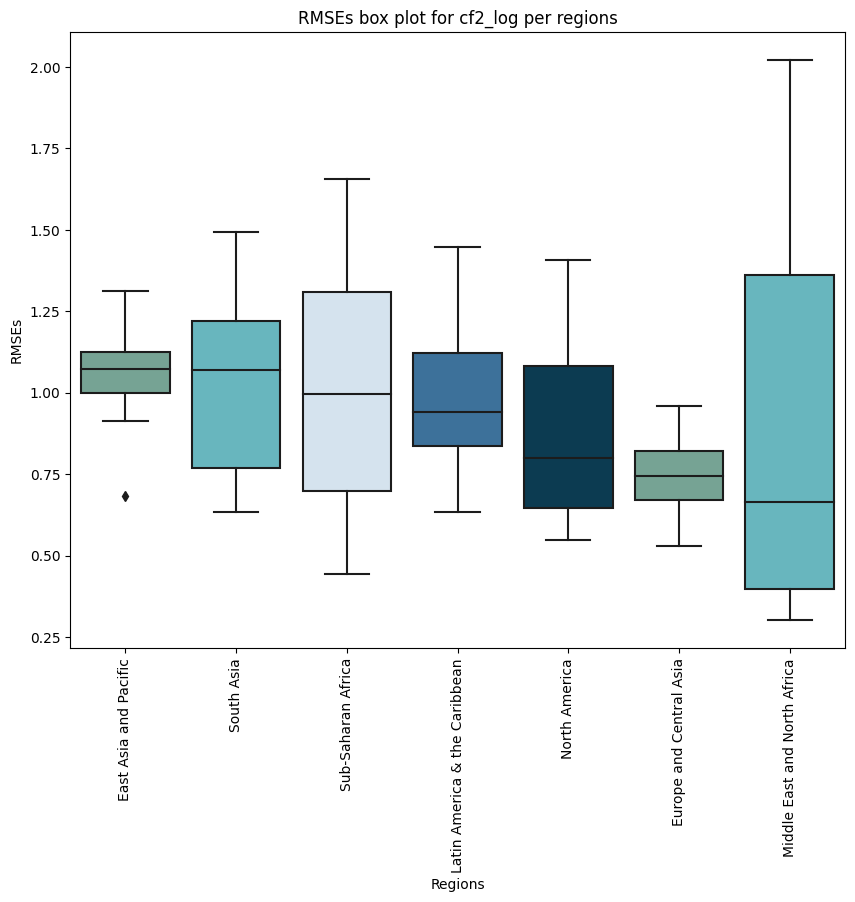

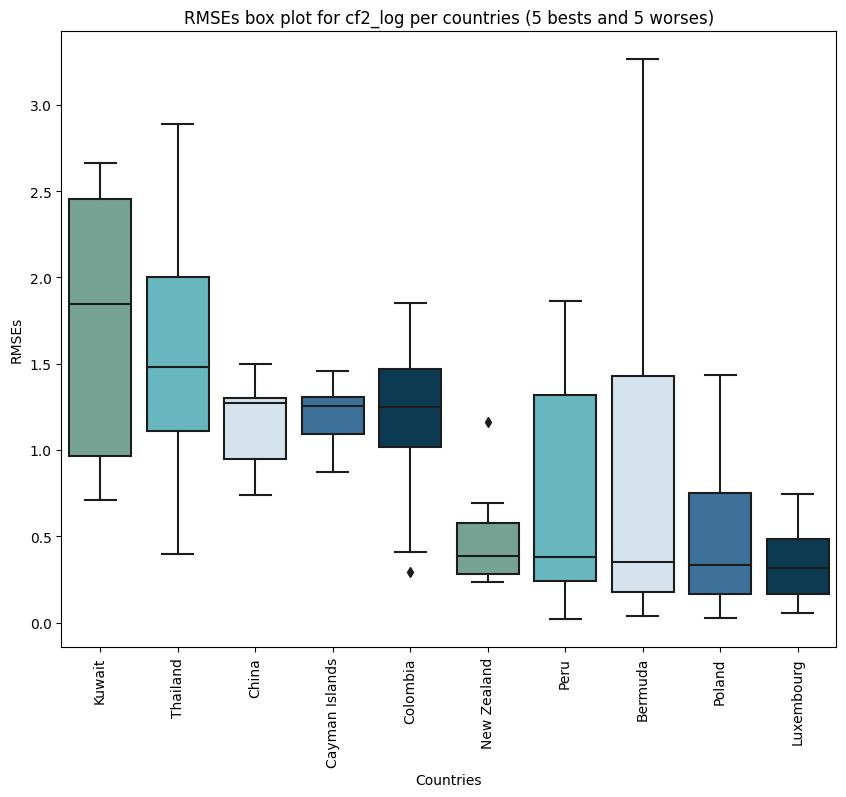

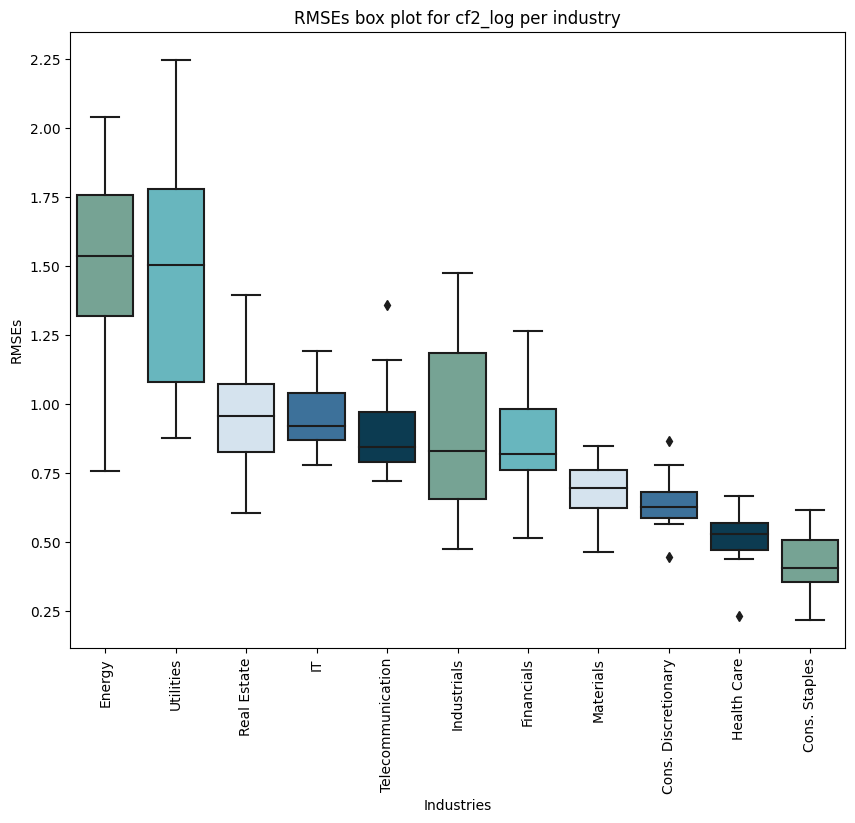

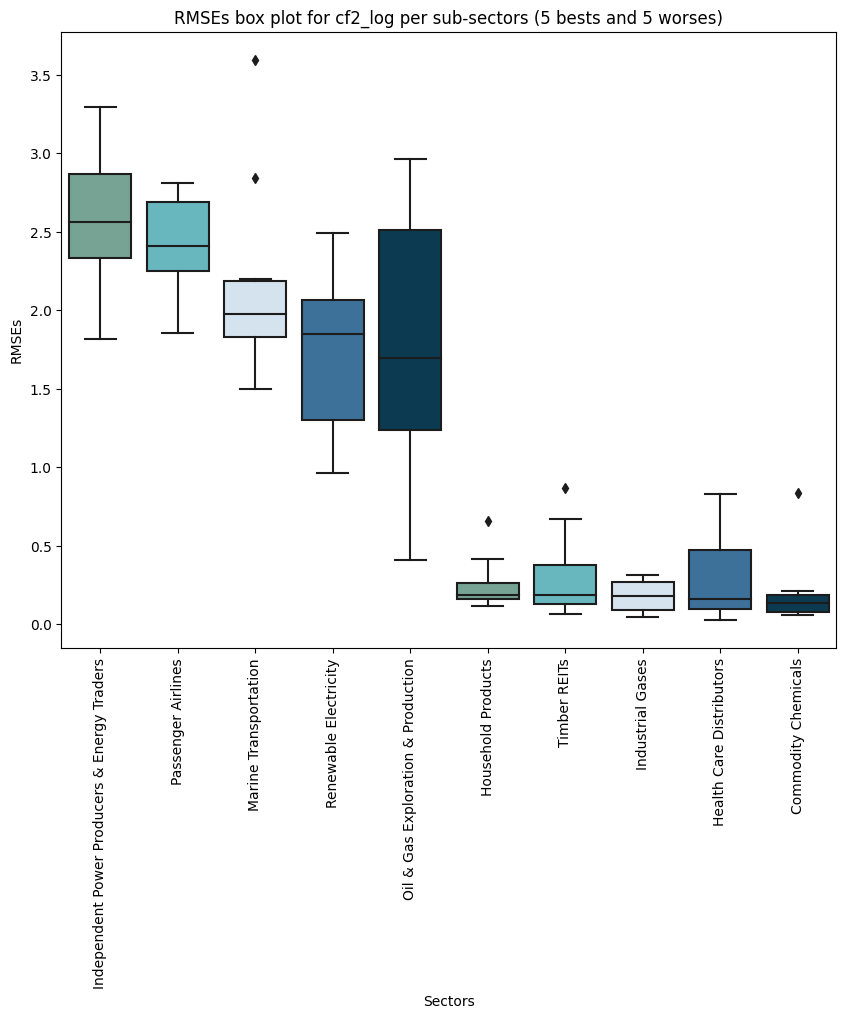

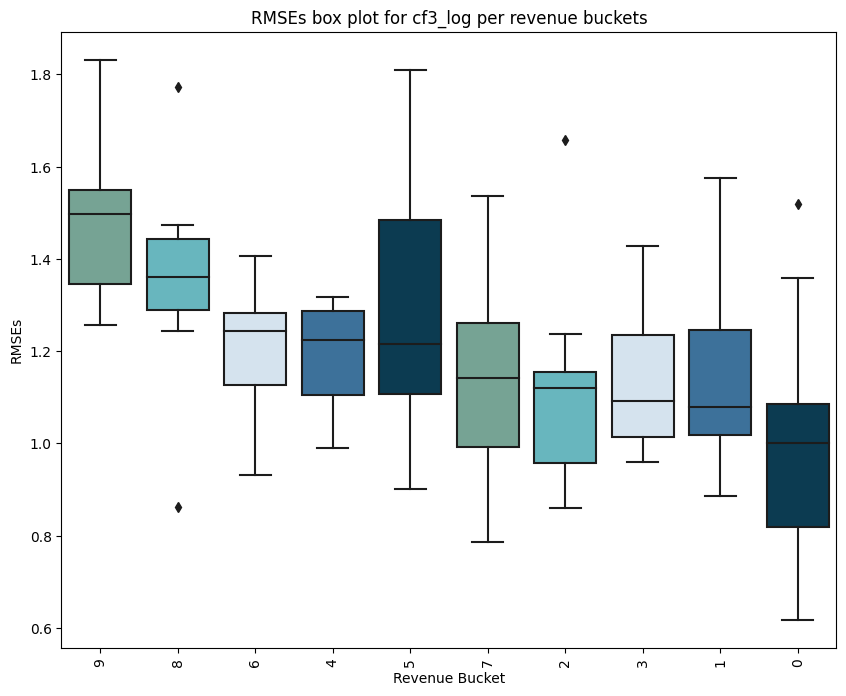

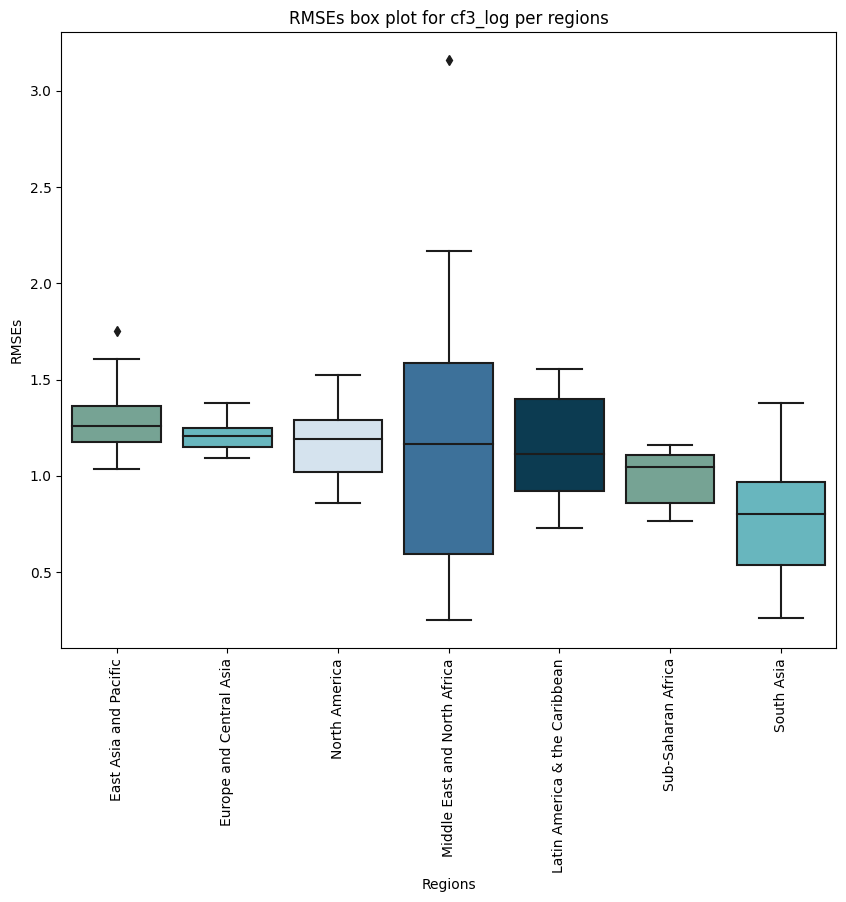

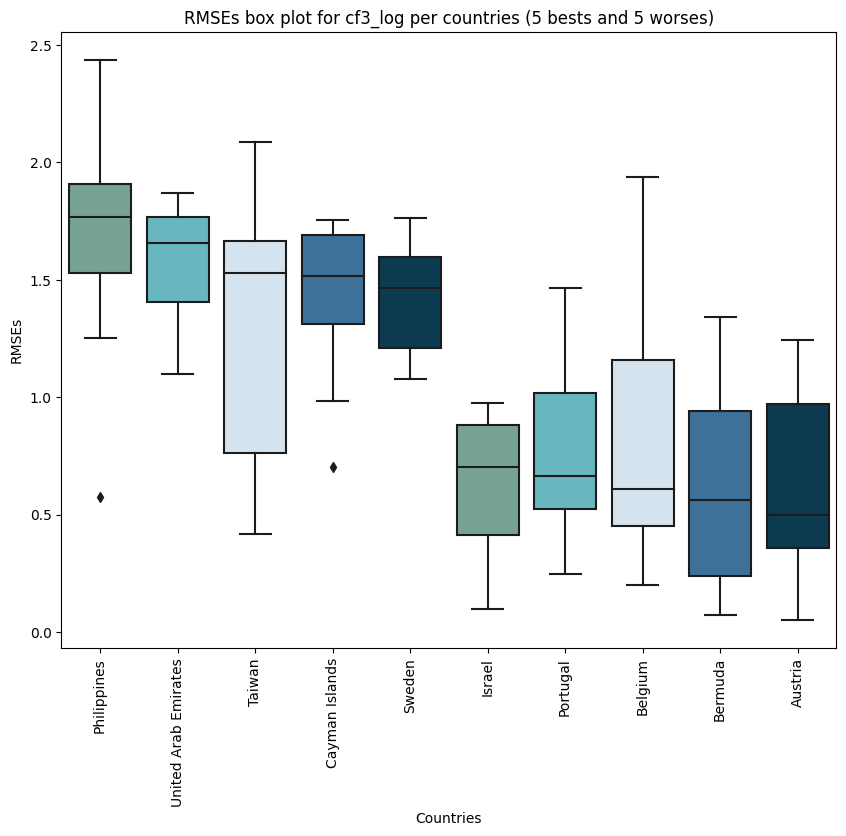

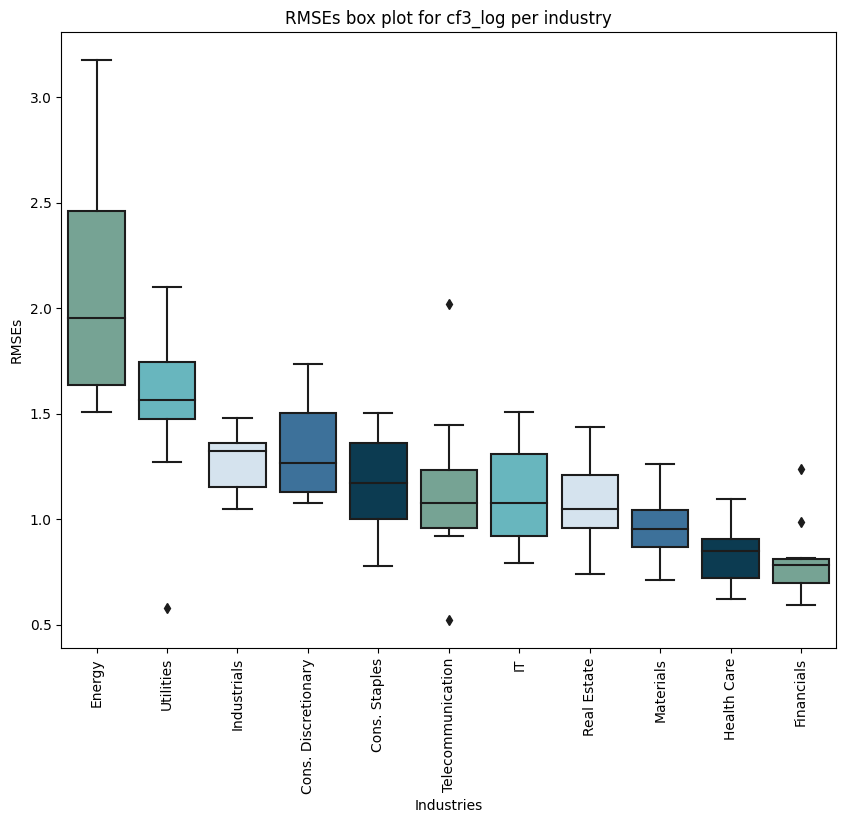

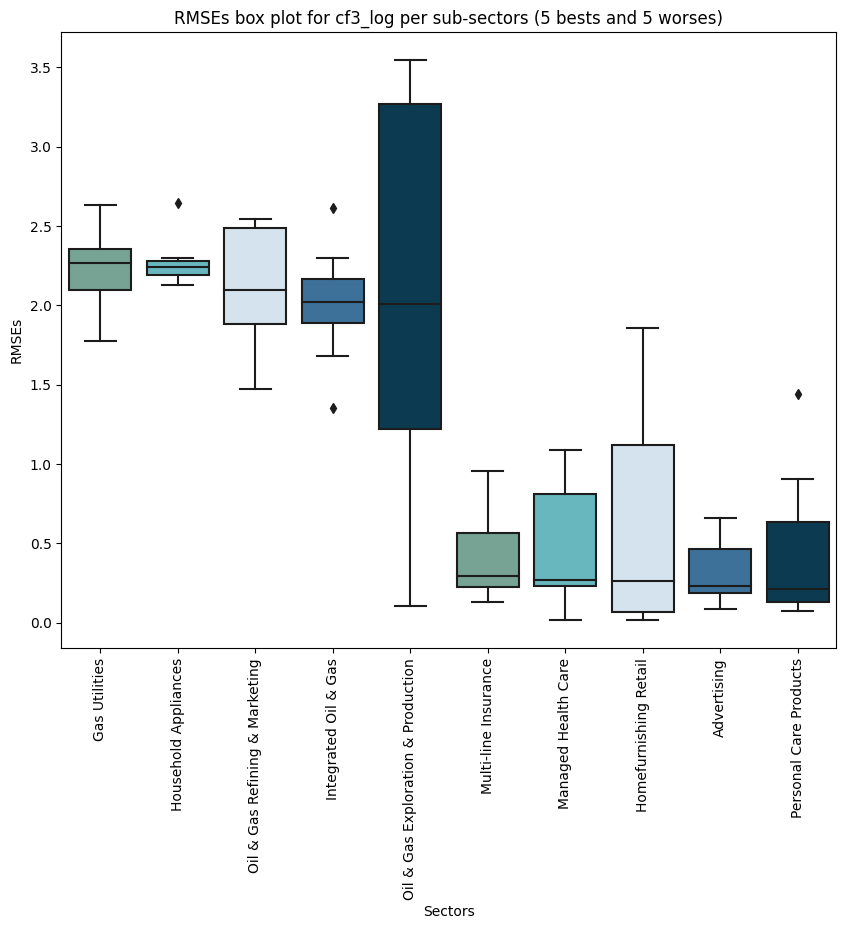

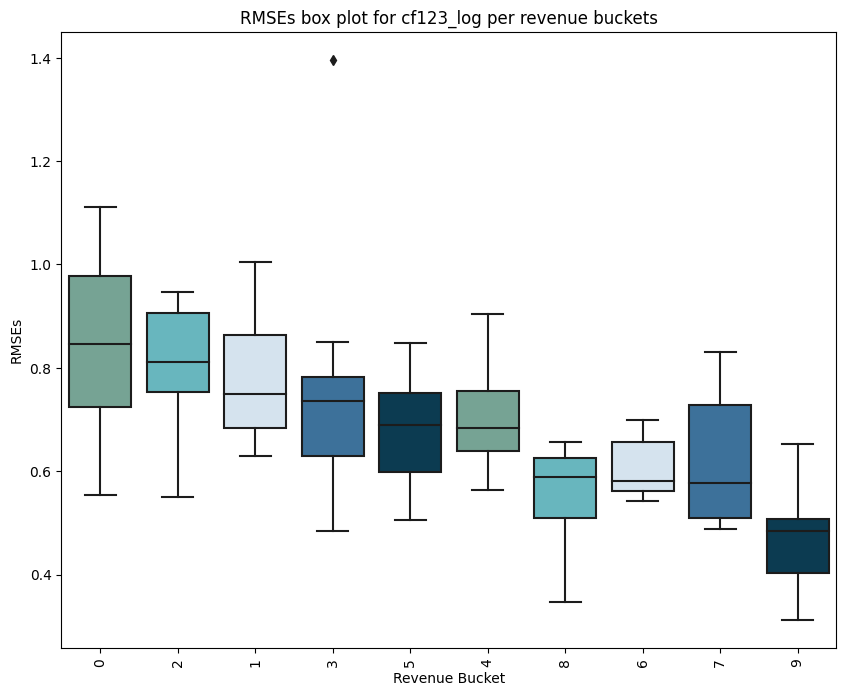

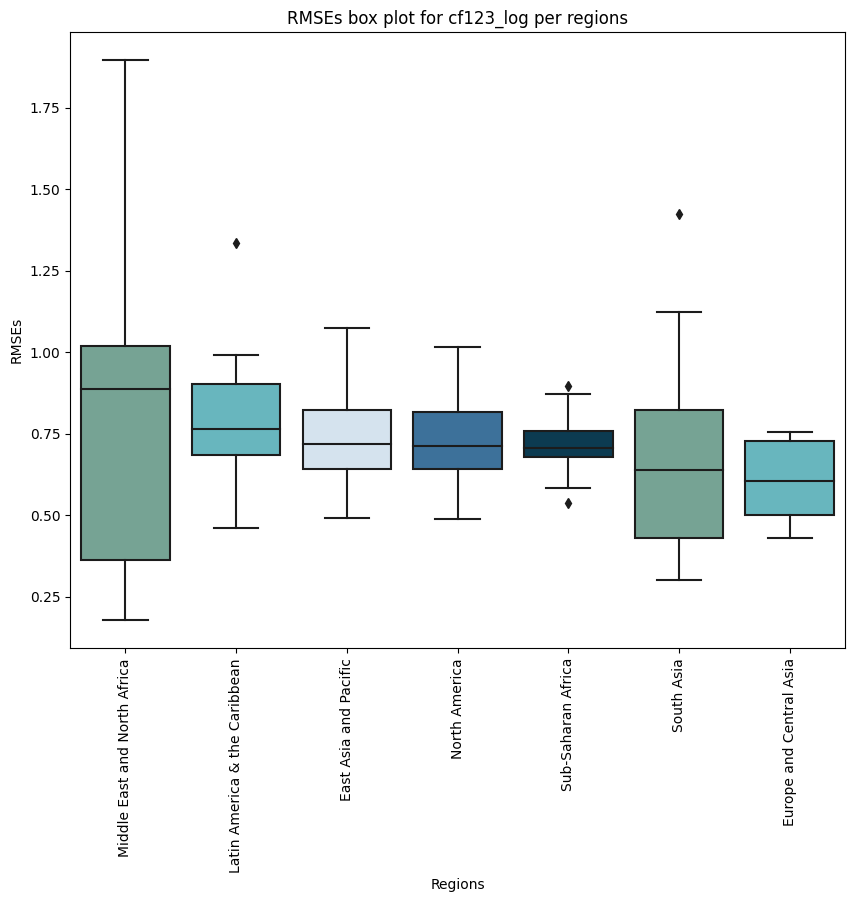

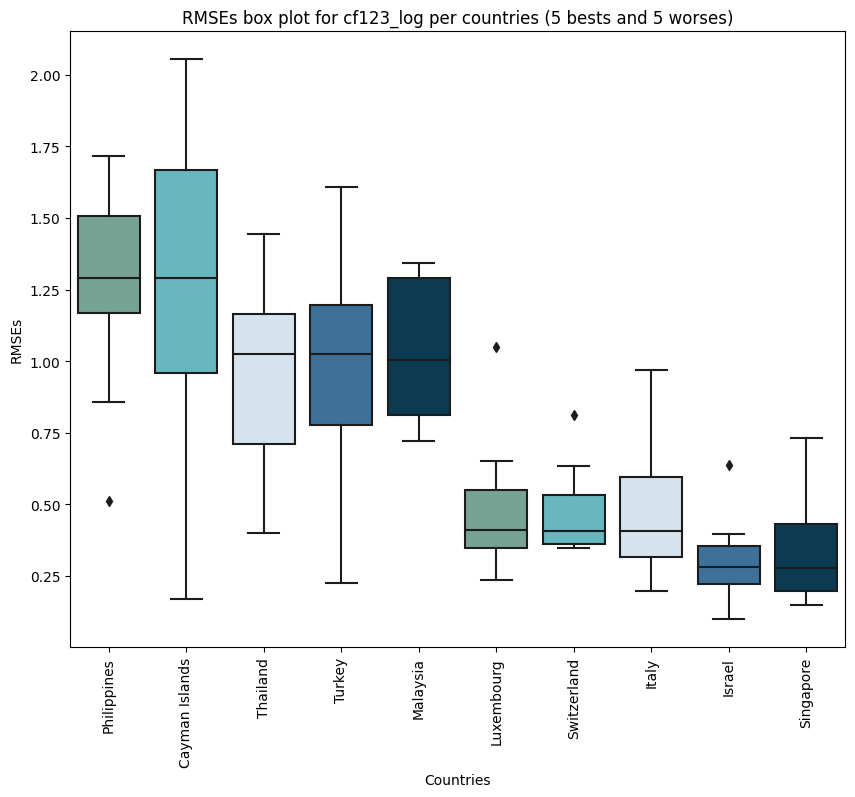

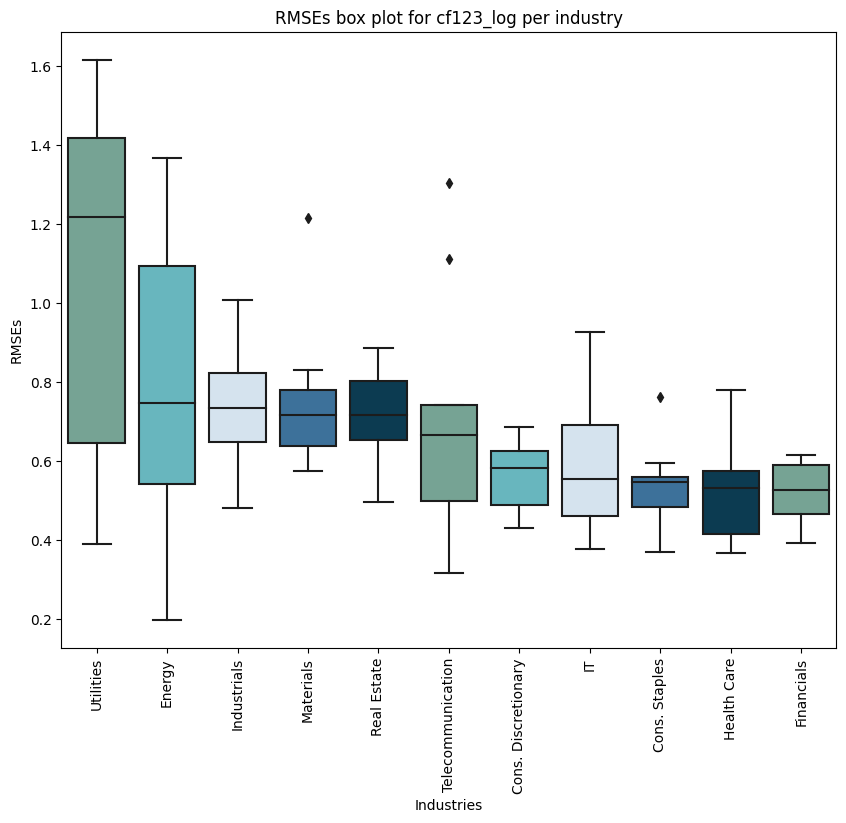

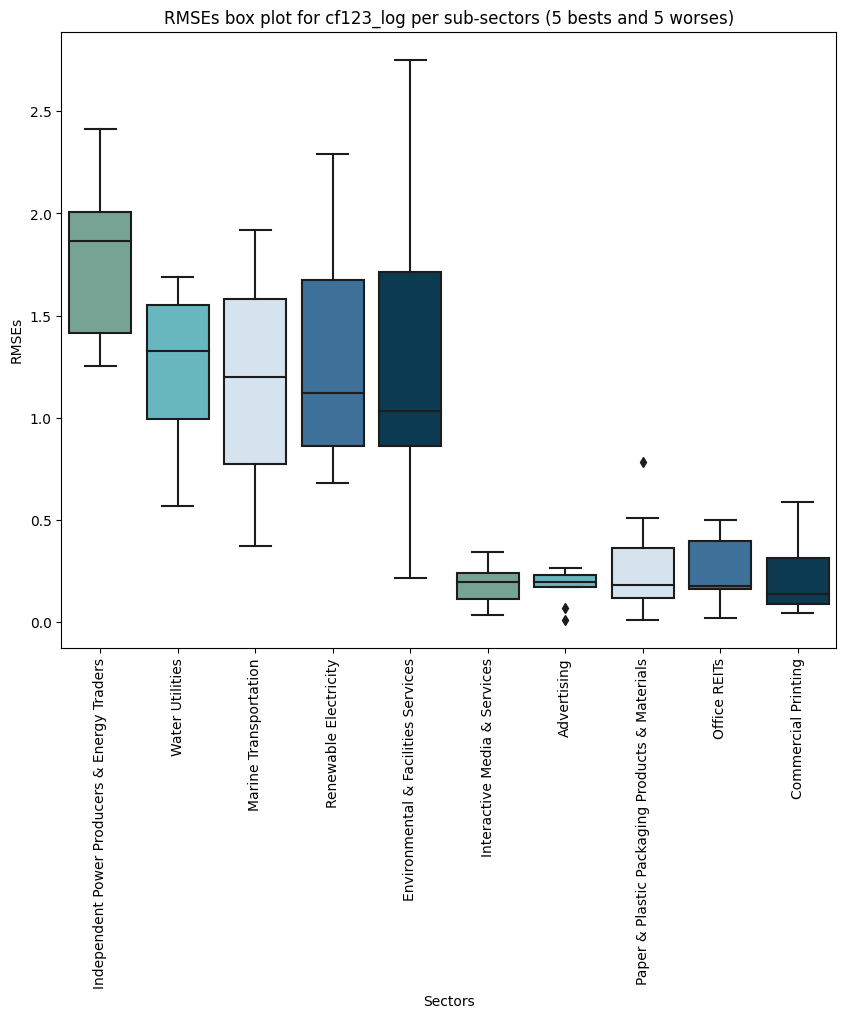

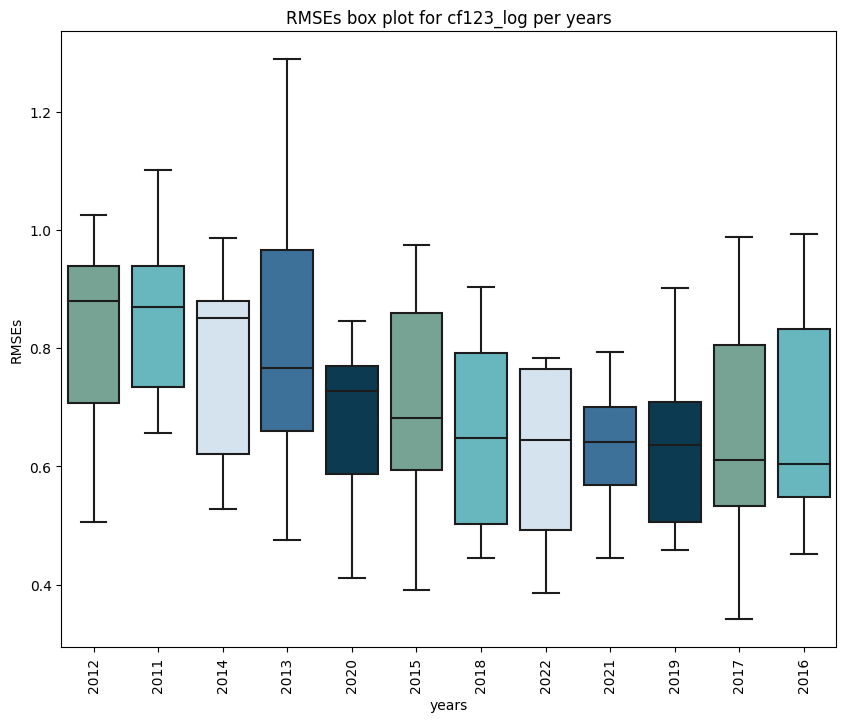

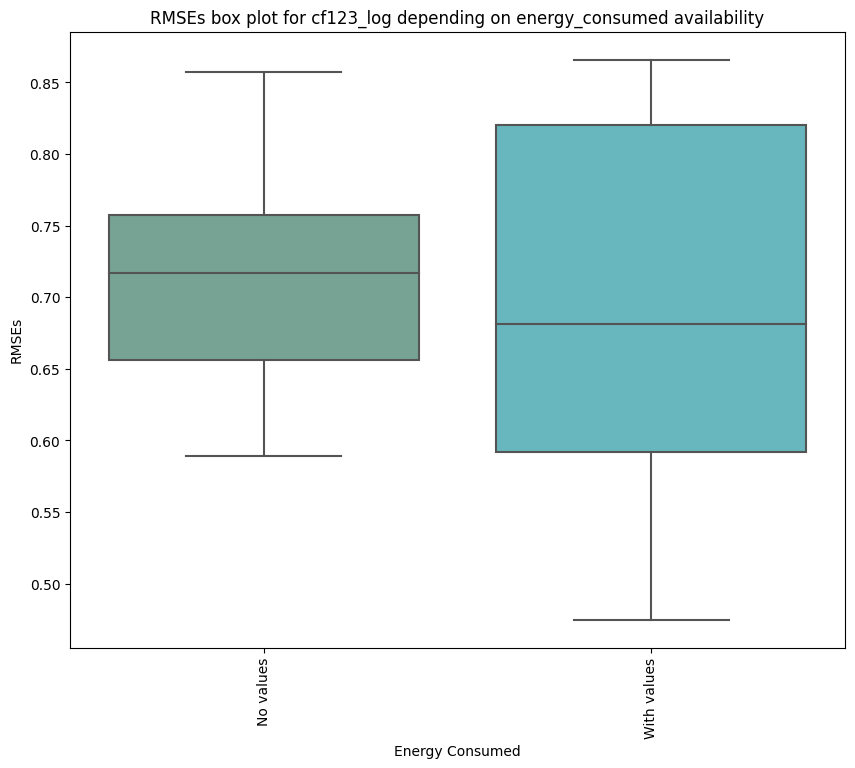

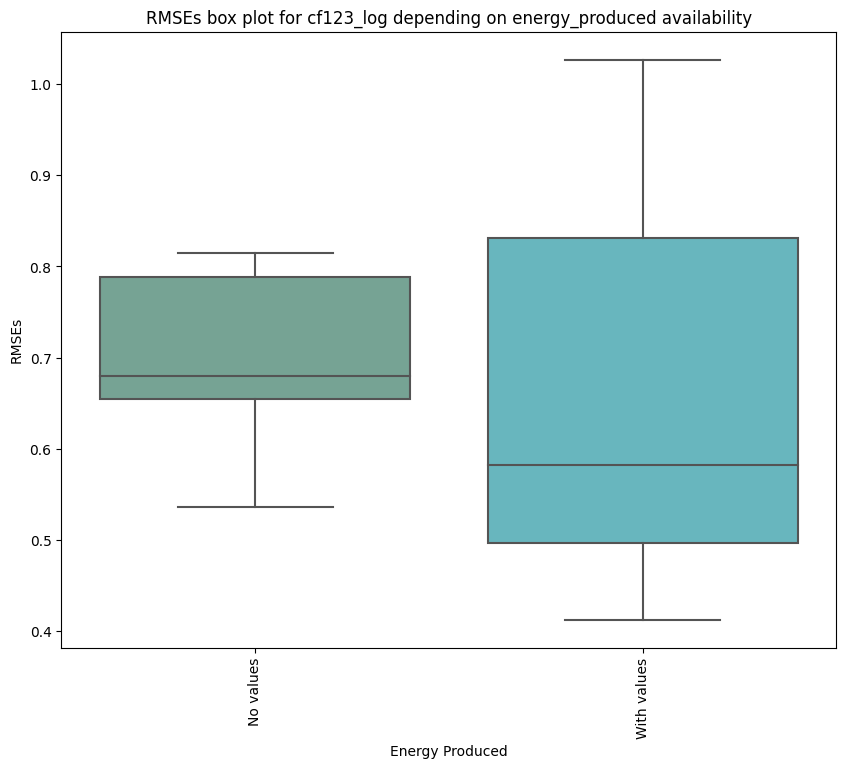

In [5]:
best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    path_benchmark=path_benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot=path_plot,
    targets=targets,
    models=models,
    summary_final=summary_final,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes=estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    restricted_features=restricted_features,
    save=save,
)

In [6]:
best_scores

[0.5360051613092625,
 0.42397407602958914,
 0.8792873418723731,
 0.5438233514493998]

# Model application

In [7]:
from functions.apply_model import apply_model_on_raw_data

In [8]:
raw_dataset = load_data(path_rawdata, filter_outliers=False, save=False)
estimations = apply_model_on_raw_data(raw_dataset,
    path_intermediary=path_intermediary,
    path_models=path_models,
    path_results=path_results,
    save=False
)
estimations

,company_id,fiscal_year,isin,ticker,gics_name,cf1_e,cf2_e,cf3_e,cf123_e,cf1_e + cf2_e + cf3_e
0,AIAS.CY,2018,CY0005200213,AIAS,Asset Management & Custody Banks,2671.982317,3329.507729,5793.856328,70901.832969,82697.179343
1,AIAS.CY,2016,CY0005200213,AIAS,Asset Management & Custody Banks,2821.749317,6009.631698,6035.942698,78077.459844,92944.783556
2,AIAS.CY,2015,CY0005200213,AIAS,Asset Management & Custody Banks,2965.887951,6009.631698,4881.231159,75039.825926,88896.576734
3,AIAS.CY,2011,CY0005200213,AIAS,Asset Management & Custody Banks,3522.196293,10847.727966,9302.396231,58657.657029,82329.977520
4,AIAS.CY,2010,CY0005200213,AIAS,Asset Management & Custody Banks,2812.935418,10883.192786,1440.779396,138478.608797,153615.516398
...,...,...,...,...,...,...,...,...,...,...
596972,PBYI.OQ,2021,US74587V1070,PBYI,Biotechnology,2769.674650,2489.387887,24309.025204,41399.497519,70967.585260
596973,PBYI.OQ,2020,US74587V1070,PBYI,Biotechnology,2845.325226,2475.478358,18493.912562,26935.641543,50750.357689
596974,PBYI.OQ,2019,US74587V1070,PBYI,Biotechnology,3625.478490,2917.082333,18318.949463,22695.061674,47556.571960
596975,PBYI.OQ,2018,US74587V1070,PBYI,Biotechnology,3309.919349,3059.065835,19323.211503,30229.760615,55921.957302
